<a href="https://www.kaggle.com/code/scr0ll0/exploratory-data-analysis?scriptVersionId=152635586" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Loading Data

In [2]:
train_prompts = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv')
train = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/train_essays.csv')
test = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/test_essays.csv')
sample = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv')

In [3]:
train_prompts

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [4]:
train

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [5]:
test

,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


In [6]:
sample

,id,generated
0,0000aaaa,0.1
1,1111bbbb,0.9
2,2222cccc,0.4


# EDA

**Missing Data:**

In [7]:
train.isna().sum()

id           0
prompt_id    0
text         0
generated    0
dtype: int64

**Countplots:**

In [8]:
train['id'].value_counts()

id
0059830c    1
a4a1c088    1
a648260a    1
a623a791    1
a5fd6487    1
           ..
5aa35c97    1
5a810c9d    1
5a6c9d91    1
5a3184fb    1
ffe1ca0d    1
Name: count, Length: 1378, dtype: int64

All IDs are unique as expected.

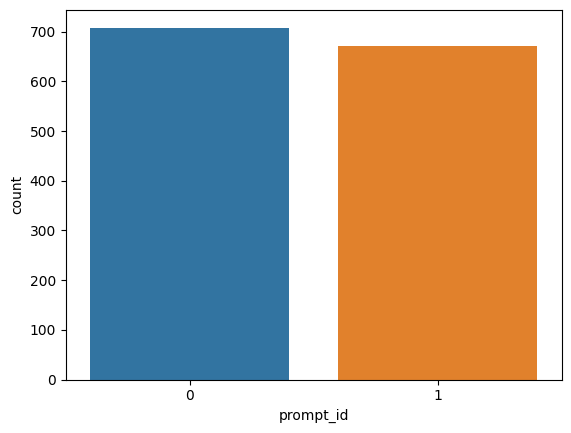

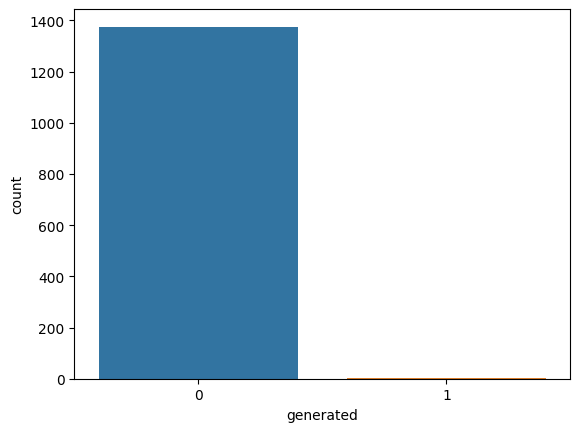

In [9]:
for i in ['prompt_id', 'generated']:
    plot = sns.countplot(data=train, x=i)
    plt.show()

Prompt IDs are relatively balanced, slightly favoring prompt 0.

Highly imbalanced target; only 3 entries that are generated. Need to balance out the classes somehow.

**Text Data:**

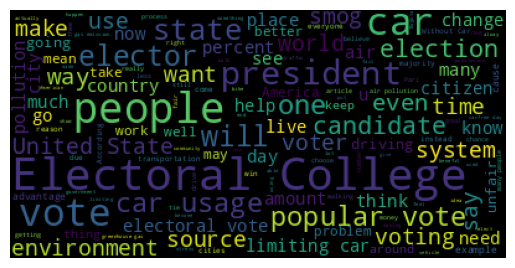

In [10]:
text = " ".join(i for i in train.text)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Electoral, College, people, president, poupular,vote, car, usage are all popular, but let's split by prompt_id to get a better idea.

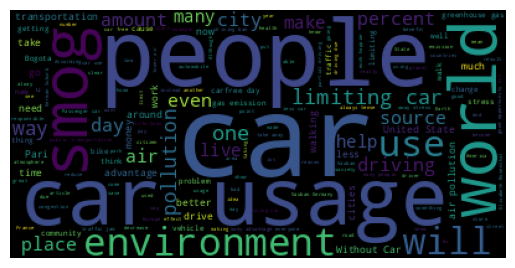

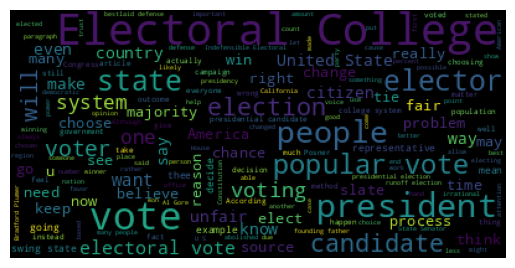

In [11]:
for i in train['prompt_id'].unique():
    text = " ".join(i for i in train[train['prompt_id'] == i].text)
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Indeed, Prompt 0 is all about cars, smog, people, and world, while Prompt 1 is all about the Electoral College in elections. Let's split by the generated text now.

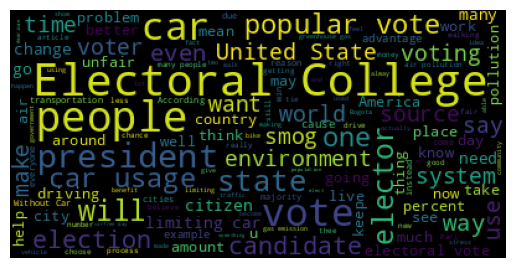

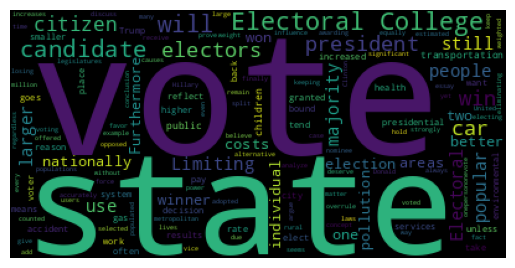

In [12]:
for i in train['generated'].unique():
    text = " ".join(i for i in train[train['generated'] == i].text)
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [13]:
train[train['generated'] == 1]

,id,prompt_id,text,generated
704,82131f68,1,"This essay will analyze, discuss and prove one...",1
740,86fe4f18,1,I strongly believe that the Electoral College ...,1
1262,eafb8a56,0,"Limiting car use causes pollution, increases c...",1


The terms from Prompt 1 are more prevalent in the wordcloud because there are two generated pieces of text from Prompt 1 and just one for Prompt 0. Let's take a look at the length of the text.

<Axes: xlabel='word_lengths', ylabel='Count'>

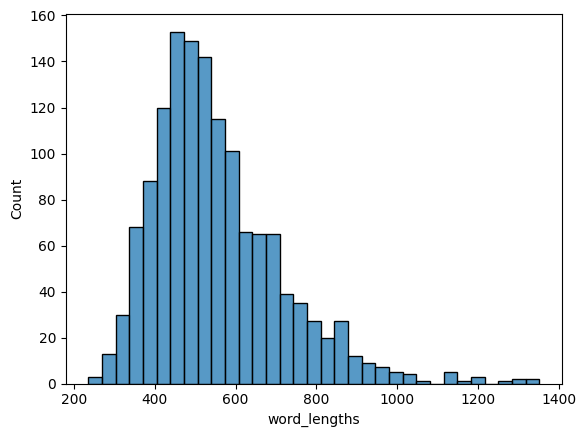

In [14]:
train['word_lengths'] = train['text'].apply(lambda x: len(x.split(' ')))
sns.histplot(data=train['word_lengths'])

We can see that the lengths of each essay tend to be skewed right.

<Axes: xlabel='prompt_id', ylabel='word_lengths'>

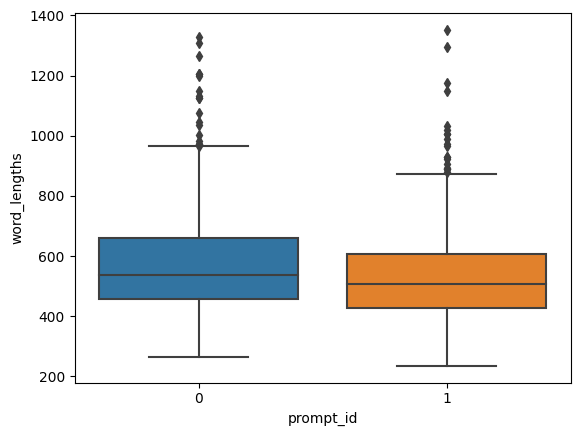

In [15]:
sns.boxplot(data=train, y='word_lengths', x='prompt_id')

Relationship is preserved even when splitting by prompt.

<Axes: xlabel='generated', ylabel='word_lengths'>

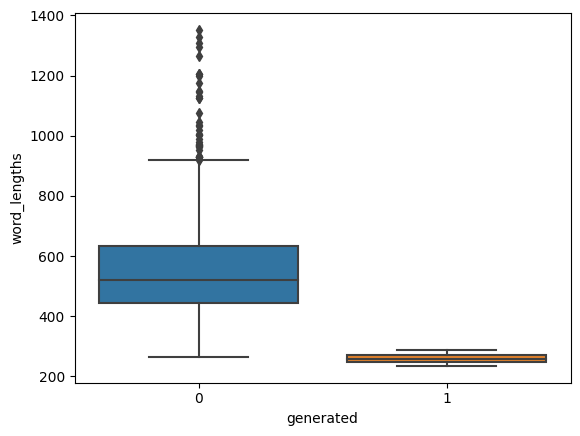

In [16]:
sns.boxplot(data=train, y='word_lengths', x='generated')

However, the generated essays never exceed 300 words in length while many written essays are between 400 and 600 words in length. This is almost a dead giveaway that an essay is generated with our current dataset.

<Axes: xlabel='char_lengths', ylabel='Count'>

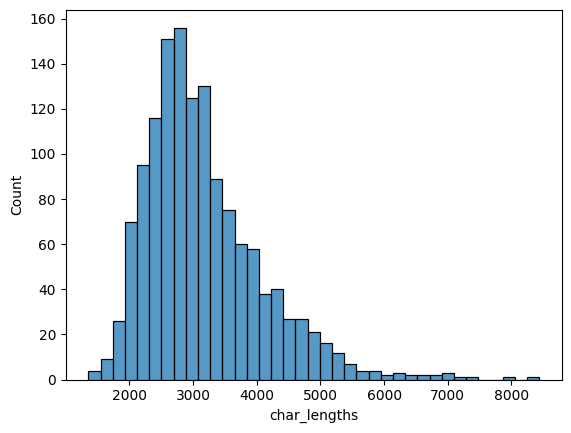

In [17]:
train['char_lengths'] = train['text'].apply(lambda x: len([*x]))
sns.histplot(data=train['char_lengths'])

<Axes: xlabel='prompt_id', ylabel='char_lengths'>

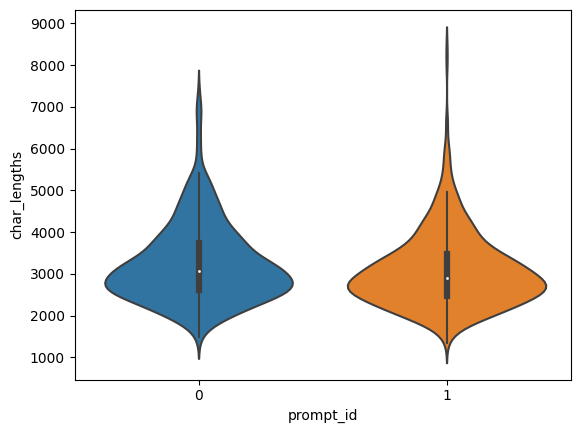

In [18]:
sns.violinplot(data=train, y='char_lengths', x='prompt_id')

<Axes: xlabel='generated', ylabel='char_lengths'>

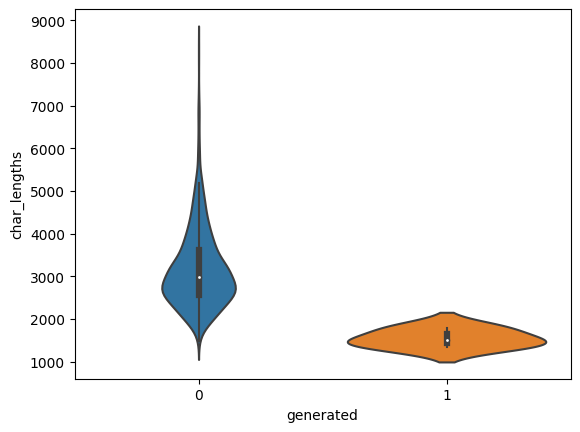

In [19]:
sns.violinplot(data=train, y='char_lengths', x='generated')

We see similar relationships with characters as we do with words.

<Axes: xlabel='avg_char_lengths', ylabel='Count'>

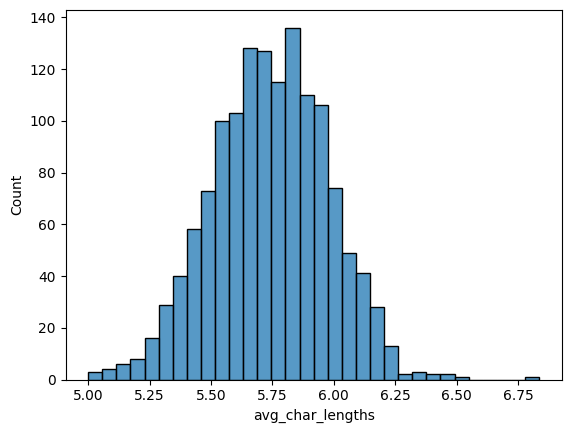

In [20]:
train['avg_char_lengths'] = train['text'].apply(lambda x: len([*x]))/train['word_lengths']
sns.histplot(data=train['avg_char_lengths'])

Average character lengths though are approximately normal.

<Axes: xlabel='prompt_id', ylabel='avg_char_lengths'>

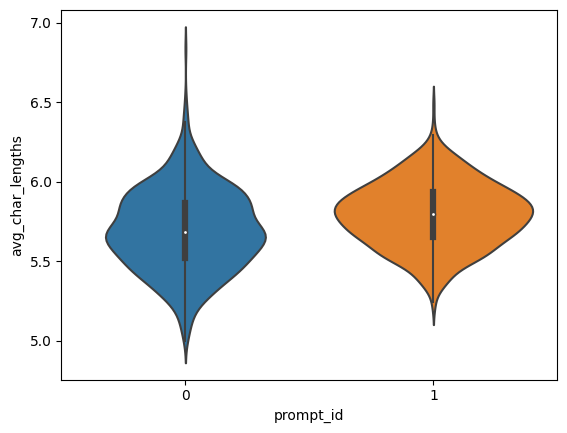

In [21]:
sns.violinplot(data=train, y='avg_char_lengths', x='prompt_id')

<Axes: xlabel='generated', ylabel='avg_char_lengths'>

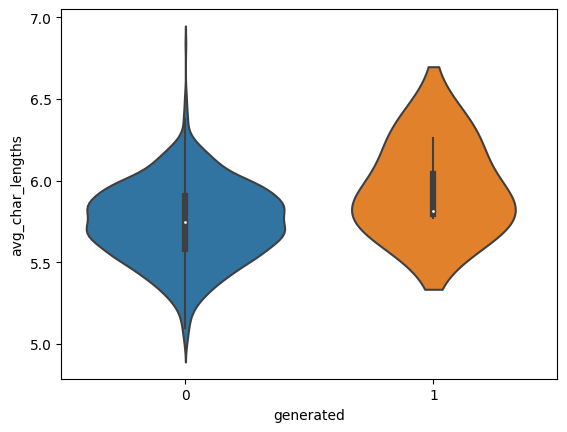

In [22]:
sns.violinplot(data=train, y='avg_char_lengths', x='generated')

We can see that on average, generated text has longer words than non-generated text, although part of that may be due to prompt 1 having longer words than prompt 0, and there is more generated text for prompt 1.

<Axes: xlabel='sentence_lengths', ylabel='Count'>

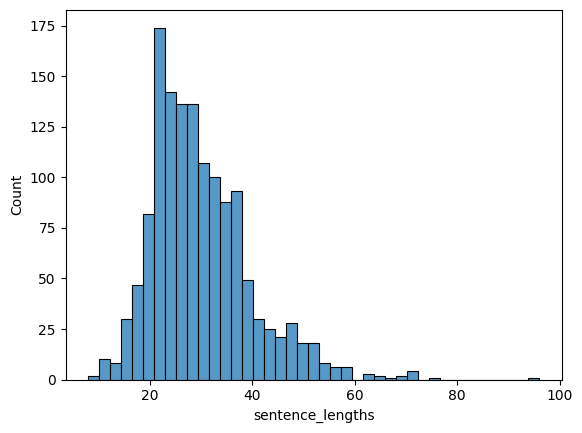

In [23]:
train['sentence_lengths'] = train['text'].apply(lambda x: len(x.split('.')))
sns.histplot(data=train['sentence_lengths'])

<Axes: xlabel='prompt_id', ylabel='sentence_lengths'>

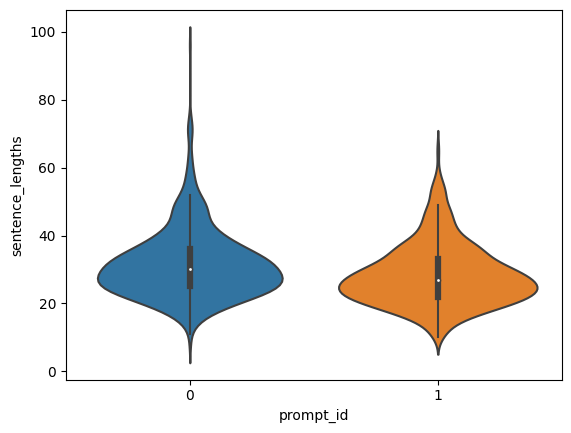

In [24]:
sns.violinplot(data=train, y='sentence_lengths', x='prompt_id')

<Axes: xlabel='generated', ylabel='sentence_lengths'>

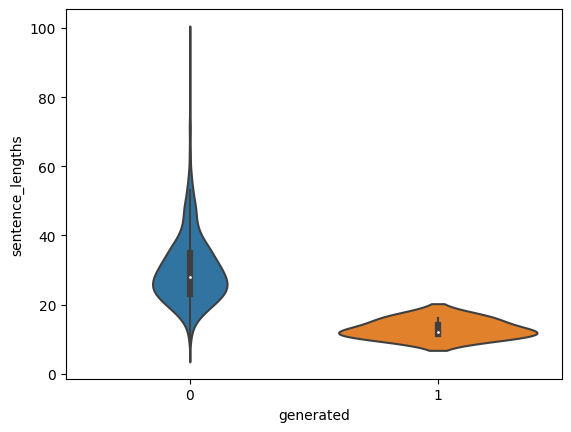

In [25]:
sns.violinplot(data=train, y='sentence_lengths', x='generated')

Sentence lengths are skewed right, and we can see that generated text uses significantly fewer sentences than non-generated text.